# **Modélisation des distributions d’espèces** <br>*Les effets de priorité et la limitation de la dispersion affectent-ils les possibilités d’inférence des déterminants de la niche ?*
*Présentation du 21 mars 2023*


In [ ]:
# jupyter nbconvert Presentation.ipynb --no-input --to html

In [3]:
# Importation des librairies
import random
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import plotly.graph_objects as go
from shapely.geometry import LineString

$$(e_{i1})^{1/s}+(e_{i2})^{1/s}=1$$

<div class="alert alert-block alert-info">
<b>Nomenclature:</b> Pour la suite de cette partie, nous considérons <b>2 espèces</b> qui se partagent <b>2 ressources</b>.<br>L'<b><font color='blue'>espèce 1</font></b>, généraliste, peut utiliser la <b><font color='green'>ressource 1</font></b> et la <b><font color='red'>ressource 2</font></b> de façon équivalente.<br>L'<b><font color='orange'>espèce 2</font></b> est spécialiste de la <b><font color='red'>ressource 2</font></b>.
</div>

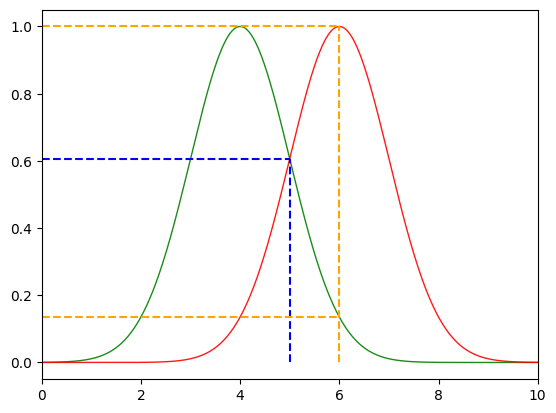

In [54]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0,10)
# standard deviation of normal distribution
sigma = 1
# mean of normal distribution
mu1 = 4
mu2 = 6

x1 = np.linspace(stats.norm.ppf(0.000001, loc=mu1, scale=sigma),
                stats.norm.ppf(0.99999999999999, loc=mu1, scale=sigma), 1000)
y1 = stats.norm.pdf(x1, loc=mu1, scale=sigma)
y1 = np.divide(y1,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)
x2 = np.linspace(stats.norm.ppf(0.00000000000001, loc=mu2, scale=sigma),
                stats.norm.ppf(0.999999, loc=mu2, scale=sigma), 1000)
y2 = stats.norm.pdf(x2, loc=mu2, scale=sigma)
y2 = np.divide(y2,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)

ax.plot(x1, y1,
        'g-', lw=1, alpha=0.9, label='lognorm pdf')
ax.plot(x2, y2,
        'r-', lw=1, alpha=0.9, label='lognorm pdf')
first_line = LineString(np.column_stack((x1, y1)))
second_line = LineString(np.column_stack((x2, y2)))
intersection = first_line.intersection(second_line)
xint, yint = intersection.xy
ax.plot([xint[0],xint[0]],[0,yint[0]], color = 'blue', linestyle = 'dashed')
ax.plot([0,xint[0]],[yint[0],yint[0]], color = 'blue', linestyle = 'dashed')

ax.plot([0,mu2],
        [1]*2, color = 'orange', linestyle = 'dashed')
ax.plot([0,mu2],
        [stats.norm.pdf(mu2, loc=mu1, scale=sigma)/stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*2, color = 'orange', linestyle = 'dashed')
ax.plot([mu2]*2,
        [0,1], color = 'orange', linestyle = 'dashed')

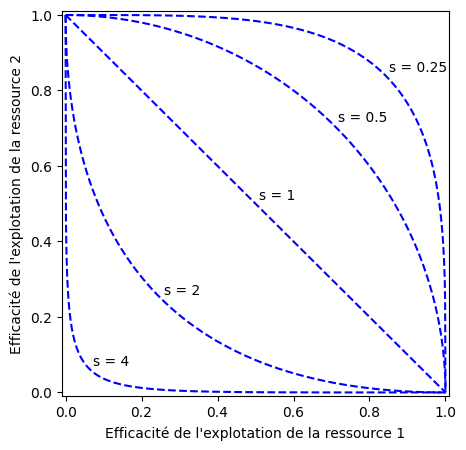

In [9]:
s = [0.25,0.5,1,2,4]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
ax.set_xlabel("Efficacité de l'explotation de la ressource 1")
ax.set_ylabel("Efficacité de l'explotation de la ressource 2")
x = np.linspace(0,1,1000)
xlab = [i/500*0.5 for i in range(1000)]
ylab = [i/500 - i/500*0.5 for i in range(1000)]
for i in range(len(s)):
    y = (1-(x)**(1/s[i]))**s[i]
    first_line = LineString(np.column_stack((x, y)))
    lab_line = LineString(np.column_stack((xlab, ylab)))
    intersection_lab = first_line.intersection(lab_line)
    ax.plot(x, y, 'b--')
    lab1, lab2 = intersection_lab.xy
    ax.annotate(str('s = '+str(s[i])), xy=(lab1[0]+0.01,lab2[0]+0.01), xycoords='data')

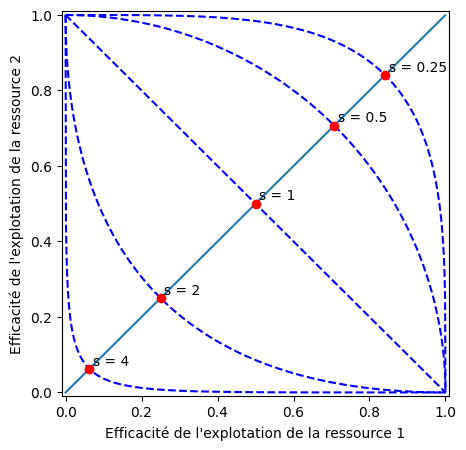

In [16]:
reg = 0.5
s = [0.25,0.5,1,2,4]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
ax.set_xlabel("Efficacité de l'explotation de la ressource 1")
ax.set_ylabel("Efficacité de l'explotation de la ressource 2")
x = np.linspace(0,1,1000)
xreg = [i/500*reg for i in range(1000)]
yreg = [i/500 - i/500*reg for i in range(1000)]
xlab = [i/500*0.5 for i in range(1000)]
ylab = [i/500 - i/500*0.5 for i in range(1000)]
ax.plot(xreg, yreg)
for i in range(len(s)):
    y = (1-(x)**(1/s[i]))**s[i]
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString(np.column_stack((xreg, yreg)))
    lab_line = LineString(np.column_stack((xlab, ylab)))
    intersection = first_line.intersection(second_line)
    intersection_lab = first_line.intersection(lab_line)
    ax.plot(x, y, 'b--')
    ax.plot(*intersection.xy, 'ro')
    lab1, lab2 = intersection_lab.xy
    ax.annotate(str('s = '+str(s[i])), xy=(lab1[0]+0.01,lab2[0]+0.01), xycoords='data')